## 1. numpy & pandas 자체 퀴즈

### 1-1. numpy

In [4]:
import numpy as np
import pandas as pd

## Numpy.
x = np.arange(12)
print(x)

# 1. x의 차원 수와 shape는 무엇인가
print(x.ndim)
print(x.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
1
(12,)


In [5]:
# 2. 행의 크기는 2로 고정 & 열의 크기는 x 원소의 개수에 따라 유동적으로 설정되도록 x를 reshape 하시오. (reshape 함수 사용)
x2 = x.reshape(2, -1)
print(x2.shape)

(2, 6)


In [6]:
# 3. x를 (2,3,2)의 배열로 변환 (reshape 사용)
x3 = x.reshape(2, 3, 2)
print(x3.shape)

(2, 3, 2)


In [35]:
# 4. x3의 2개의 (3,2) 행렬 중 두번째 행렬의 두번째 행을 구하세요.
print(x3[1, : ,1])

[ 7  9 11]


In [16]:
# 5. 아래 두 array의 shape를 각각 말하시오. 또한 a에 대해 b를 행의 방향으로 추가한 후 해당 데이터를 변수 c에 할당하시오
a = np.array([[1,2,3],[5,6,7]])
b = np.array([[6,8,9]])

# Q) np.concatenate((a,b),axis=1) 가능할까요? 
# np.concatenate((a, b), axis=1) 놉
np.concatenate((a, b), axis=0)

array([[1, 2, 3],
       [5, 6, 7],
       [6, 8, 9]])

### 1-2. Pandas

In [18]:
## Pandas
A = pd.DataFrame({'age':[12,4,7,19],'adults':[5,6,2,3],'money':[1000,200,350,800]})
A

,age,adults,money
0,12,5,1000
1,4,6,200
2,7,2,350
3,19,3,800


In [23]:
# 1. loc와 iloc를 활용하여 'age'와 'money'에 해당하는 데이터 뽑기 (loc 버전 & iloc 버전 모두)
print(A.loc[:,["age", "money"]])
print(A.iloc[:,[0, 2]])

   age  money
0   12   1000
1    4    200
2    7    350
3   19    800
   age  money
0   12   1000
1    4    200
2    7    350
3   19    800


In [36]:
# 2. 새로운 데이터 minsu를 'minsu'라는 명칭으로 A의 행에 추가
minsu = [15,4,700]
A.loc["minsu"] = minsu

In [37]:
A

,age,adults,money
0,12,5,1000
1,4,6,200
2,7,2,350
3,19,3,800
minsu,15,4,700


In [44]:
# 3. A에서 2번째와 5번째('minsu')에 해당하는 행 삭제

print(A.drop(["minsu", 1]))
print(A.drop("age", axis=1))

   age  adults  money
0   12       5   1000
2    7       2    350
3   19       3    800
       adults  money
0           5   1000
1           6    200
2           2    350
3           3    800
minsu       4    700


In [46]:
# Quiz) A.iloc[[0,2],['age','money']] 가능? 
# A.iloc[[0, 2], ["age", "money"]]
print(A.loc[[0, 2], ["age", "money"]])
print(A.iloc[[0, 2], [0, 2]])

   age  money
0   12   1000
2    7    350
   age  money
0   12   1000
2    7    350


## 2. matplotlib 실습2의 multibar

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

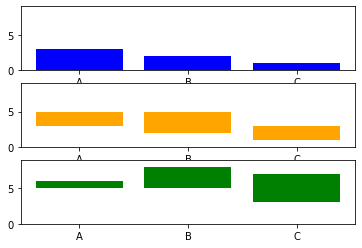

In [ ]:
fig, axes = plt.subplots(3,1) 

x = np.array([3,2,1])
y = np.array([2,3,2])
z = np.array([1,3,4])
data1 =  [x, y, z]

x_ax =  np.arange(3) # np.array([0,1,2])
colors = ['b','orange','g']

# 누적 막대 그래프 -> 막대를 여러번 쌓는 것. for문을 통해 bar 그래프를 여러번 쌓음
for i in x_ax:
    # figure의 (1,0) 위치에 Bar 그래프를 그립니다.
    # x 데이터는 x_ax, y 데이터는 각각 x,y,z로 설정합니다.
    axes[i].bar(
        x_ax, data1[i], color = colors[i],
        bottom=np.sum(data1[:i], axis=0) # bottom: 해당 barplot을 어느정도 높이에서 그릴지 설정 가능
    ) 
    axes[i].set_xticks(x_ax)
    axes[i].set_xticklabels(['A','B','C']) # label을 x_ax값인 [0,1,2]에서 ['A','B','C']로 바꿔줌 
    axes[i].set_ylim(0,9)

# 파란색 그래프는 x_ax인 np.array([0,1,2])의 각 값에 해당하는 x의 값을 bar graph로 그려놓은거임
# 주황색 그래프는 x_ax인 np.array([0,1,2])의 각 값에 해당하는 y의 값을 bar graph로 그려놓은거임. 이때 bottom을 통해 x_ax별로 대응하는 x값만큼 띄운 후 그 위에 y의 값에 해당하는 그래프를 그림. 
# 초록색 그래프는 x_ax인 np.array([0,1,2])의 각 값에 해당하는 z의 값을 bar graph로 그려놓은거임. 이때 bottom을 통해 x_ax별로 대응하는 x+y값만큼 띄운 후 그 위에 z의 값에 해당하는 그래프를 그림. 

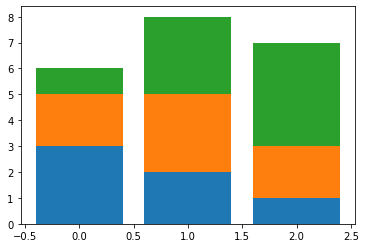

In [ ]:
# 다 합쳐서 그리면 아래와 같음
fig, ax = plt.subplots()
for i in x_ax:
    ax.bar(
        x_ax, data1[i],
        bottom=np.sum(data1[:i], axis=0)
    ) 
plt.show()

## 3. 12/3 실습 퀴즈 (numpy, pandas)
- 머릿속에서 풀어보시고 코드 돌려보세요!

### 3-1. numpy 실습 퀴즈

배열 a,b를 합쳐서 배열 c를 만드는 코드로 알맞은 것을 고르세요

In [59]:
# 물음표에 들어갈 코드로 알맞은 것을 고르세요.
import numpy as np

a = np.array([[1,2],[2,3]])
b = np.array([[1,2]])

c = np.r_[a, b]
print(c)

# 결과창
# [[ 1,  2]
# [2, 3]
# [1, 2]]

# 답안들
# 1. np.r_[a,b]
print()

# 2. np.c_[a,b.reshape((-1,1))]
print(np.c_[a,b.reshape((-1,1))])

# 3. a+b
print(a+b)

# 4. np.concatenate((a,b.reshape((-1,1))), axis=1)
print(np.concatenate((a,b.reshape((-1,1))), axis=1))

[[1 2]
 [2 3]
 [1 2]]

[[1 2 1]
 [2 3 2]]
[[2 4]
 [3 5]]
[[1 2 1]
 [2 3 2]]


In [ ]:
# 머릿속에서 풀어본 후 돌려보기

In [ ]:
a = np.array([[1,2],[2,3]])
b = np.array([[1,2]])

In [ ]:
# a의 shape는? b의 shape는?
print(a,'\n')
print(b)

In [ ]:
np.r_[a,b]

In [ ]:
np.c_[a,b.reshape((-1,1))] # b.reshape(-1,1)의 shape는?

In [73]:
a+b
# 그냥 더하지말고 expend? 사용

array([[2, 4],
       [3, 5]])

In [ ]:
np.concatenate((a,b.reshape((-1,1))), axis=1)

### 3-2. pandas 실습 퀴즈

결과 창과 동일한 출력하기 위한 코드로 올바른 것을 고르세요.

In [ ]:
# 물음표에 들어갈 코드로 알맞은 것을 고르세요.

data = [[1, 2], 
        [3, 4]]
df = pd.DataFrame(?)

print(df)

# 결과창
   a  b
0  1  3
1  2  4

# 답안들
1. {"a" : [1 ,3], "b" : [2, 4]}

2. {"a" : data[0], "b" : data[1]}, index = [0,1]

3. data, columns = ['a', 'b']

4. data, index = [0, 1], columns = ['a', 'b']

In [ ]:
# 머릿속에서 풀어본 후 돌려보기

In [71]:
data = [[1, 2], [3, 4]]

In [63]:
pd.DataFrame({"a" : [1 ,3], "b" : [2, 4]})

,a,b
0,1,2
1,3,4


In [64]:
pd.DataFrame({"a" : data[0], "b" : data[1]}, index = [0,1])

,a,b
0,1,3
1,2,4


In [70]:
data = np.array(data).T
pd.DataFrame(data, columns = ['a', 'b'])

,a,b
0,1,2
1,3,4


In [66]:
pd.DataFrame(data, index = [0, 1], columns = ['a', 'b'])

,a,b
0,1,2
1,3,4
